In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('../DATA/fake_reg.csv')

In [3]:
data.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


In [6]:
X = data[['feature1','feature2']].values

In [8]:
y= data['price'].values

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
scaler = MinMaxScaler()

In [16]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [20]:
x_train =scaler.transform(X_train)
x_test = scaler.transform(X_test)

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation

In [23]:
model  = Sequential()
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))

model.add(Dense(1))


model.compile(optimizer ='rmsprop',loss='mse')

In [24]:
model.fit(x_train,y_train,epochs=250)

Train on 670 samples
Epoch 1/250
670/670 [==============================] - 1s 1ms/sample - loss: 256629.5352
Epoch 2/250
670/670 [==============================] - 0s 113us/sample - loss: 256550.3966
Epoch 3/250
670/670 [==============================] - 0s 135us/sample - loss: 256464.7998
Epoch 4/250
670/670 [==============================] - 0s 67us/sample - loss: 256355.7236
Epoch 5/250
670/670 [==============================] - 0s 85us/sample - loss: 256223.6871
Epoch 6/250
670/670 [==============================] - 0s 94us/sample - loss: 256068.3330
Epoch 7/250
670/670 [==============================] - 0s 112us/sample - loss: 255886.9217
Epoch 8/250
670/670 [==============================] - 0s 97us/sample - loss: 255676.5647
Epoch 9/250
670/670 [==============================] - 0s 67us/sample - loss: 255436.8600
Epoch 10/250
670/670 [==============================] - 0s 71us/sample - loss: 255168.2007
Epoch 11/250
670/670 [==============================] - 0s 64us/sample - los

Epoch 91/250
670/670 [==============================] - 0s 60us/sample - loss: 2701.5587
Epoch 92/250
670/670 [==============================] - 0s 71us/sample - loss: 2128.3170
Epoch 93/250
670/670 [==============================] - 0s 60us/sample - loss: 1917.6535
Epoch 94/250
670/670 [==============================] - 0s 49us/sample - loss: 1870.3363
Epoch 95/250
670/670 [==============================] - 0s 54us/sample - loss: 1845.0862
Epoch 96/250
670/670 [==============================] - 0s 52us/sample - loss: 1816.6373
Epoch 97/250
670/670 [==============================] - 0s 57us/sample - loss: 1785.0098
Epoch 98/250
670/670 [==============================] - 0s 49us/sample - loss: 1756.8540
Epoch 99/250
670/670 [==============================] - 0s 63us/sample - loss: 1725.9867
Epoch 100/250
670/670 [==============================] - 0s 51us/sample - loss: 1692.2768
Epoch 101/250
670/670 [==============================] - 0s 54us/sample - loss: 1662.6524
Epoch 102/250
670/6

670/670 [==============================] - 0s 52us/sample - loss: 102.6811
Epoch 183/250
670/670 [==============================] - 0s 54us/sample - loss: 94.8148
Epoch 184/250
670/670 [==============================] - 0s 61us/sample - loss: 88.6943
Epoch 185/250
670/670 [==============================] - 0s 54us/sample - loss: 82.1970
Epoch 186/250
670/670 [==============================] - 0s 65us/sample - loss: 76.3087
Epoch 187/250
670/670 [==============================] - 0s 52us/sample - loss: 70.8152
Epoch 188/250
670/670 [==============================] - 0s 57us/sample - loss: 65.9734
Epoch 189/250
670/670 [==============================] - 0s 52us/sample - loss: 60.9223
Epoch 190/250
670/670 [==============================] - 0s 51us/sample - loss: 57.3226
Epoch 191/250
670/670 [==============================] - 0s 49us/sample - loss: 53.1571
Epoch 192/250
670/670 [==============================] - 0s 49us/sample - loss: 49.9615
Epoch 193/250
670/670 [======================

In [26]:
loss =model.history.history['loss']

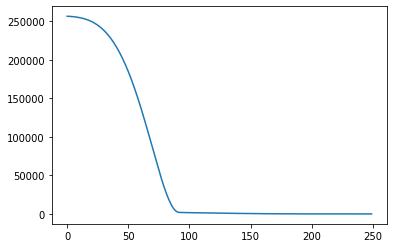

In [27]:
sns.lineplot(x=range(len(loss)),y=loss)

In [29]:
model.evaluate(x_train,y_train,verbose =0)

26.65027582538662

In [30]:
model.evaluate(x_test,y_test,verbose=0)

26.274936363913795

In [31]:
test_prediction = model.predict(x_test)

In [34]:
#sns.lineplot(x= y_test, y= test_prediction)

In [35]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [36]:
mean_absolute_error(y_test,test_prediction)

4.1233599281498545

In [39]:
mean_squared_error(y_test,test_prediction)**.5

5.125908761341113

In [40]:
new_val =[[998,1000]]

In [43]:
new_val =scaler.transform(new_val)

In [44]:
model.predict(new_val)

array([[418.51358]], dtype=float32)